In [82]:
#Load data files(titanic_test.csv as test,titanic_train.csv as train)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [83]:
#List of column names
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [84]:
#Sample of data(head())
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [85]:
#Types of data columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
#Summary statistics
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Oreskovic, Mr. Luka",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [87]:
#Give information about survived column use countplot(in seaborn package)

Survived column has 891 observation as other factors. It consists of "0" and "1" which referred to "not survived" and "survived" representatively.

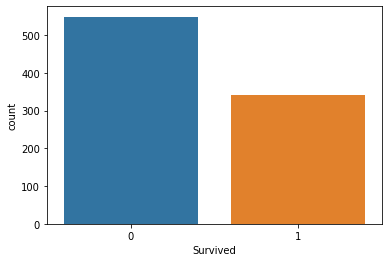

In [88]:
sns.countplot(x = "Survived", data = train)

As it is visible above countplot the unsurvived passengers are more than others.

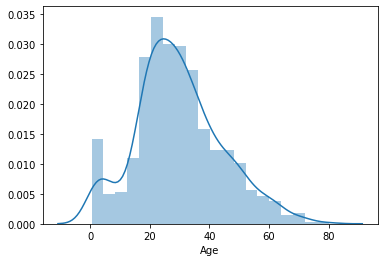

In [89]:
#Give information about Age with distplot
import warnings
warnings.filterwarnings("ignore")
sns.distplot(train.Age, bins = 20)

The data which illustrated in this distribution plot shows us that most of the passengers in this tragedical journey had 25-35 years old in average. In the other hand there were enough number of children with ages between 0-10 years old. Let's look at how many of them were in this accident

In [90]:
train.Survived[train.Age < 10].sum()

38

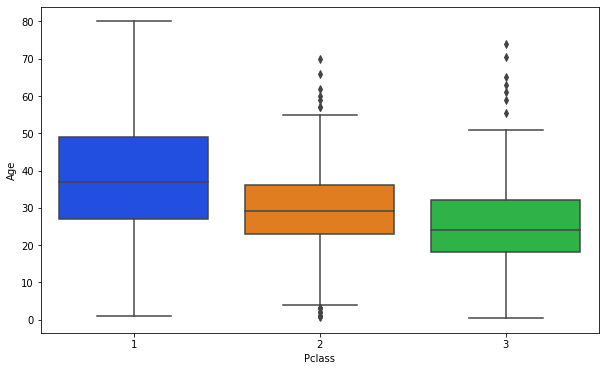

In [91]:
#Give information about Age and Pclass with boxplot(use figsize)
plt.figure(figsize=(10,6))
sns.boxplot(x="Pclass", y="Age", data = train, palette='bright')

In [92]:
#(2)DATA CLEANING AND PREPROCESSING
#Find missing values(for test and train)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [94]:
train["Age"].fillna(train["Age"].mean(), inplace=True)

In [95]:
train["Cabin"].fillna(train["Cabin"].mode(), inplace=True)

In [96]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
dtype: int64

In [97]:
test["Age"].fillna(test["Age"].mean(), inplace=True)

In [98]:
test["Cabin"].fillna(test["Cabin"].mode(), inplace=True)

In [99]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          326
Embarked         0
dtype: int64

In [100]:
#(3)PREDICTIVE MODELLING
#Remove Cabin column from test and train 
train = train.drop(['Cabin', "Ticket", "PassengerId", "Name"], 1)

In [101]:
#Build dummy variables for categorical variables for train and test
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [102]:
test = test.drop(['Cabin', "Ticket", "PassengerId", "Name"], 1)

In [103]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [104]:
train = pd.get_dummies(train, drop_first=True)

In [105]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [106]:
test = pd.get_dummies(test, drop_first=True)

In [107]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [109]:
#Create target variable
X = train.iloc[:, 1:9].values
y = train.iloc[:, 0].values

In [111]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [112]:
# Import our model and performance assessement classes from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [113]:
#(a)LOGISTIC REGRESSION ALGORITHM
#Fit model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_model = logreg.fit(X_train, y_train)

In [114]:
#Predict values for cv data
logreg_prediction = logreg.predict(X_test)

In [115]:
#Evaluate accuracy of model and confusion matrix
print(confusion_matrix(logreg_prediction, y_test))
print(classification_report(logreg_prediction, y_test))

[[117  25]
 [ 22  59]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       142
           1       0.70      0.73      0.72        81

    accuracy                           0.79       223
   macro avg       0.77      0.78      0.77       223
weighted avg       0.79      0.79      0.79       223



In [116]:
#(b)DECISION TREE ALGORITHM
#Fit model
decision_classifier = DecisionTreeClassifier()
decision_classifier = decision_classifier.fit(X_train,y_train)

In [117]:
#Predict values for cv data = decision_classifier.predict(X_test)
y_pred = decision_classifier.predict(X_test)

In [118]:
#Evaluate accuracy of model
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7757847533632287


In [119]:
#(c)RANDOM FOREST Classifier ALGORITHM
#Fit model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = None)
rf.fit(X_train, y_train)

In [120]:
#Predict values for cv data
predictions = rf.predict(X_test)

In [121]:
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.24 degrees.


In [124]:
#Evaluate accuracy of model
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: nan %.


In [125]:
#(d)SUPPORT VECTOR MACHINE (SVM) ALGORITHM
# Fit (train) the Support Vector Machine classifier
svm_clf = SVC()
svm_model = svm_clf.fit(X_train, y_train)

In [126]:
#Predict values for cv data
svm_prediction = svm_clf.predict(X_test)

In [127]:
#Evaluate accuracy of model
print("Accuracy {0:.2f}%".format(100*accuracy_score(svm_prediction, y_test)))
print(confusion_matrix(svm_prediction, y_test))

Accuracy 70.85%
[[115  41]
 [ 24  43]]


In [128]:
#(e)NAIVE BAYES ALGORITHM
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

In [129]:
#Predict values for cv data
y_pred_gnb = gnb.predict(X_test)

In [131]:
#Evaluate accuracy of model
gnb_accuracy = 100*accuracy_score(y_pred_gnb, y_test)
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred_gnb, y_test)))

Accuracy 78.03%


In [132]:
#(f)K-NEAREST NEIGHBOR(kNN) ALGORITHM
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_model = knn_clf.fit(X_train, y_train)

In [133]:
#Predict values for cv data
knn_prediction = knn_clf.predict(X_test)

In [134]:
#Evaluate accuracy of model
print("Accuracy {0:.2f}%".format(100*accuracy_score(knn_prediction, y_test)))

Accuracy 72.65%


In [135]:
#Apply Xgboostclassifier
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [136]:
#Clustering
#Visualize data for clustering 
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[128  11]
 [ 23  61]]


0.8475336322869955

In [138]:
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [186]:
train1 = pd.read_csv("titanic_train.csv")

In [187]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [188]:
train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [189]:
train1["Age"].fillna(train1["Age"].mean(), inplace=True)

In [190]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [191]:
train1 = train1.iloc[:, [0,5]].values

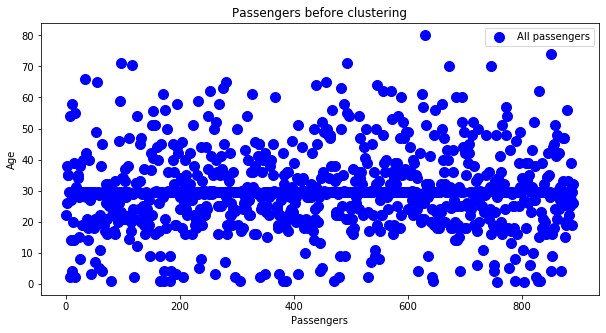

In [192]:
# Elbow method to determine K
fig = plt.figure(figsize = (10,5))
plt.scatter(train1[:,0], train1[:,1],s=100,c='blue',label='All passengers')
plt.title('Passengers before clustering')
plt.xlabel('Passengers')
plt.ylabel('Age')
plt.legend()
plt.show()

In [193]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(train1)
    wcss.append(kmeans.inertia_)
wcss

[59096046.63594411,
 14886148.234689247,
 6700023.956997402,
 3833293.065012363,
 2506858.3439362887,
 1786489.4262640104,
 1352145.547501936,
 1068911.9359359685,
 877247.5362636652,
 737773.7288839549]

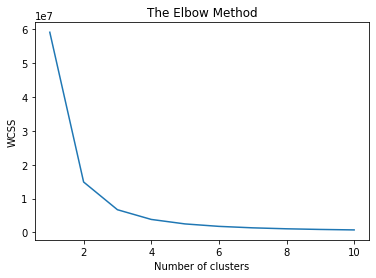

In [194]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [195]:
# fit K_means with founded K
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(train1)

In [196]:
kmeans.cluster_centers_

array([[444.5       ,  30.21480162],
       [742.5       ,  29.74135018],
       [148.        ,  29.13552742]])

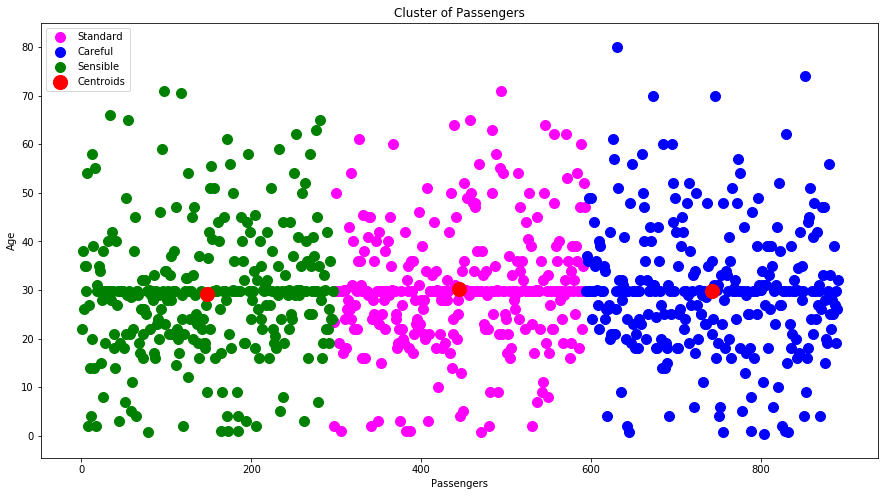

In [197]:
#Lets plot those clusters!
fig = plt.figure(figsize = (15,8))
plt.scatter(train1[y_kmeans==0,0],train1[y_kmeans==0,1],s=100,c='magenta',label='Standard')
plt.scatter(train1[y_kmeans==1,0],train1[y_kmeans==1,1],s=100,c='blue',label='Careful')
plt.scatter(train1[y_kmeans==2,0],train1[y_kmeans==2,1],s=100,c='green',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids')
plt.title('Cluster of Passengers')
plt.xlabel('Passengers')
plt.ylabel('Age')
plt.legend()
plt.show()